In [1]:
# Name: Dhruv Kumar
# Roll No.: 24419CMP011
# Course: M.Sc. Computer Science
# Semester: 2nd

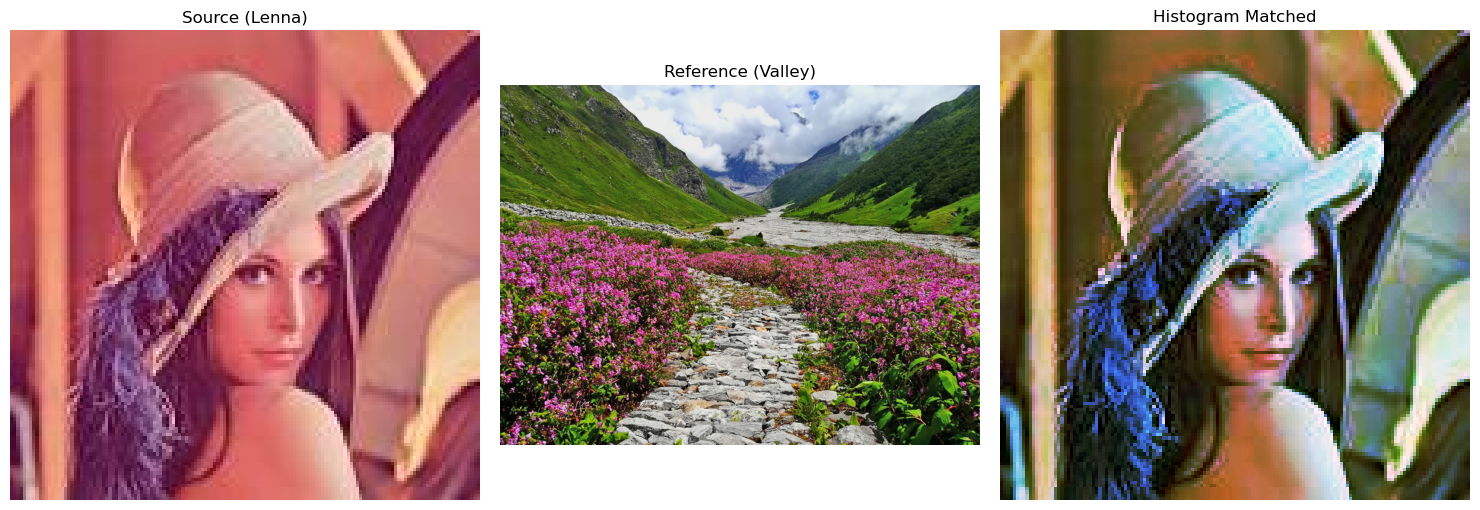

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_histogram(channel):
    hist = [0] * 256
    h, w = channel.shape
    for i in range(h):
        for j in range(w):
            val = channel[i, j]
            hist[val] += 1
    return hist

def compute_cdf(hist, total_pixels):
    cdf = [0] * 256
    cdf[0] = hist[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + hist[i]
    return [x / total_pixels for x in cdf]

def find_mapping(src_cdf, ref_cdf):
    mapping = [0] * 256
    for i in range(256):
        min_diff = 1.0
        match = 0
        for j in range(256):
            diff = abs(src_cdf[i] - ref_cdf[j])
            if diff < min_diff:
                min_diff = diff
                match = j
        mapping[i] = match
    return mapping

def apply_mapping(channel, mapping):
    h, w = channel.shape
    matched = np.zeros((h, w), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            matched[i, j] = mapping[channel[i, j]]
    return matched

def manual_histogram_matching(src, ref):
    src_hist = compute_histogram(src)
    ref_hist = compute_histogram(ref)

    src_cdf = compute_cdf(src_hist, src.shape[0] * src.shape[1])
    ref_cdf = compute_cdf(ref_hist, ref.shape[0] * ref.shape[1])

    mapping = find_mapping(src_cdf, ref_cdf)
    return apply_mapping(src, mapping)

def match_histograms(src_img, ref_img):
    matched_img = np.zeros_like(src_img, dtype=np.uint8)
    for ch in range(3):
        matched_img[:, :, ch] = manual_histogram_matching(src_img[:, :, ch], ref_img[:, :, ch])
    return matched_img

# Load images
source = cv2.imread('D:\\Code\\lenna.jpeg')
reference = cv2.imread('D:\\Code\\valley.jpg')

# Convert to RGB for correct plotting
source_rgb = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
reference_rgb = cv2.cvtColor(reference, cv2.COLOR_BGR2RGB)

# Apply histogram matching
matched_rgb = match_histograms(source_rgb, reference_rgb)

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(source_rgb)
axes[0].set_title('Source (Lenna)')
axes[0].axis('off')

axes[1].imshow(reference_rgb)
axes[1].set_title('Reference (Valley)')
axes[1].axis('off')

axes[2].imshow(matched_rgb)
axes[2].set_title('Histogram Matched')
axes[2].axis('off')

plt.tight_layout()
plt.show()

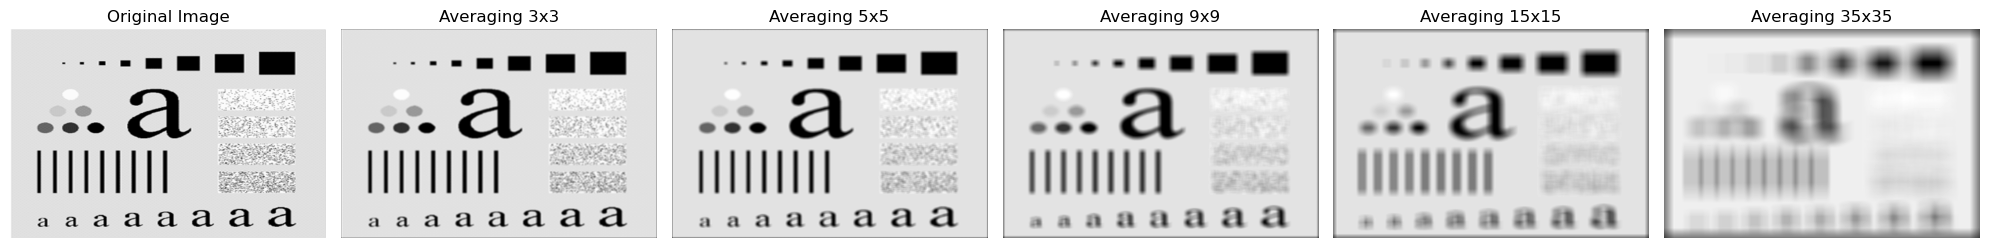

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_averaging_filter(image, size):
    pad = size // 2
    rows, cols = image.shape

    # Pad the image with zeros
    padded_img = np.zeros((rows + 2 * pad, cols + 2 * pad))
    for i in range(rows):
        for j in range(cols):
            padded_img[i + pad][j + pad] = image[i][j]

    # Create output image
    output = np.zeros_like(image)

    # Apply the mean filter
    for i in range(rows):
        for j in range(cols):
            window = padded_img[i:i + size, j:j + size]
            output[i, j] = np.sum(window) // (size * size)
    return output

def main():
    img = cv2.imread('D:\\Code\\test_img.png', cv2.IMREAD_GRAYSCALE)

    filter_sizes = [3, 5, 9, 15, 35]
    smoothed_images = []

    for size in filter_sizes:
        blurred = apply_averaging_filter(img, size)
        smoothed_images.append(blurred)

    # Plot original and filtered images
    fig, axes = plt.subplots(1, len(filter_sizes) + 1, figsize=(20, 5))

    axes[0].imshow(img, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    for i in range(len(filter_sizes)):
        axes[i + 1].imshow(smoothed_images[i], cmap='gray')
        axes[i + 1].set_title(f'Averaging {filter_sizes[i]}x{filter_sizes[i]}')
        axes[i + 1].axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

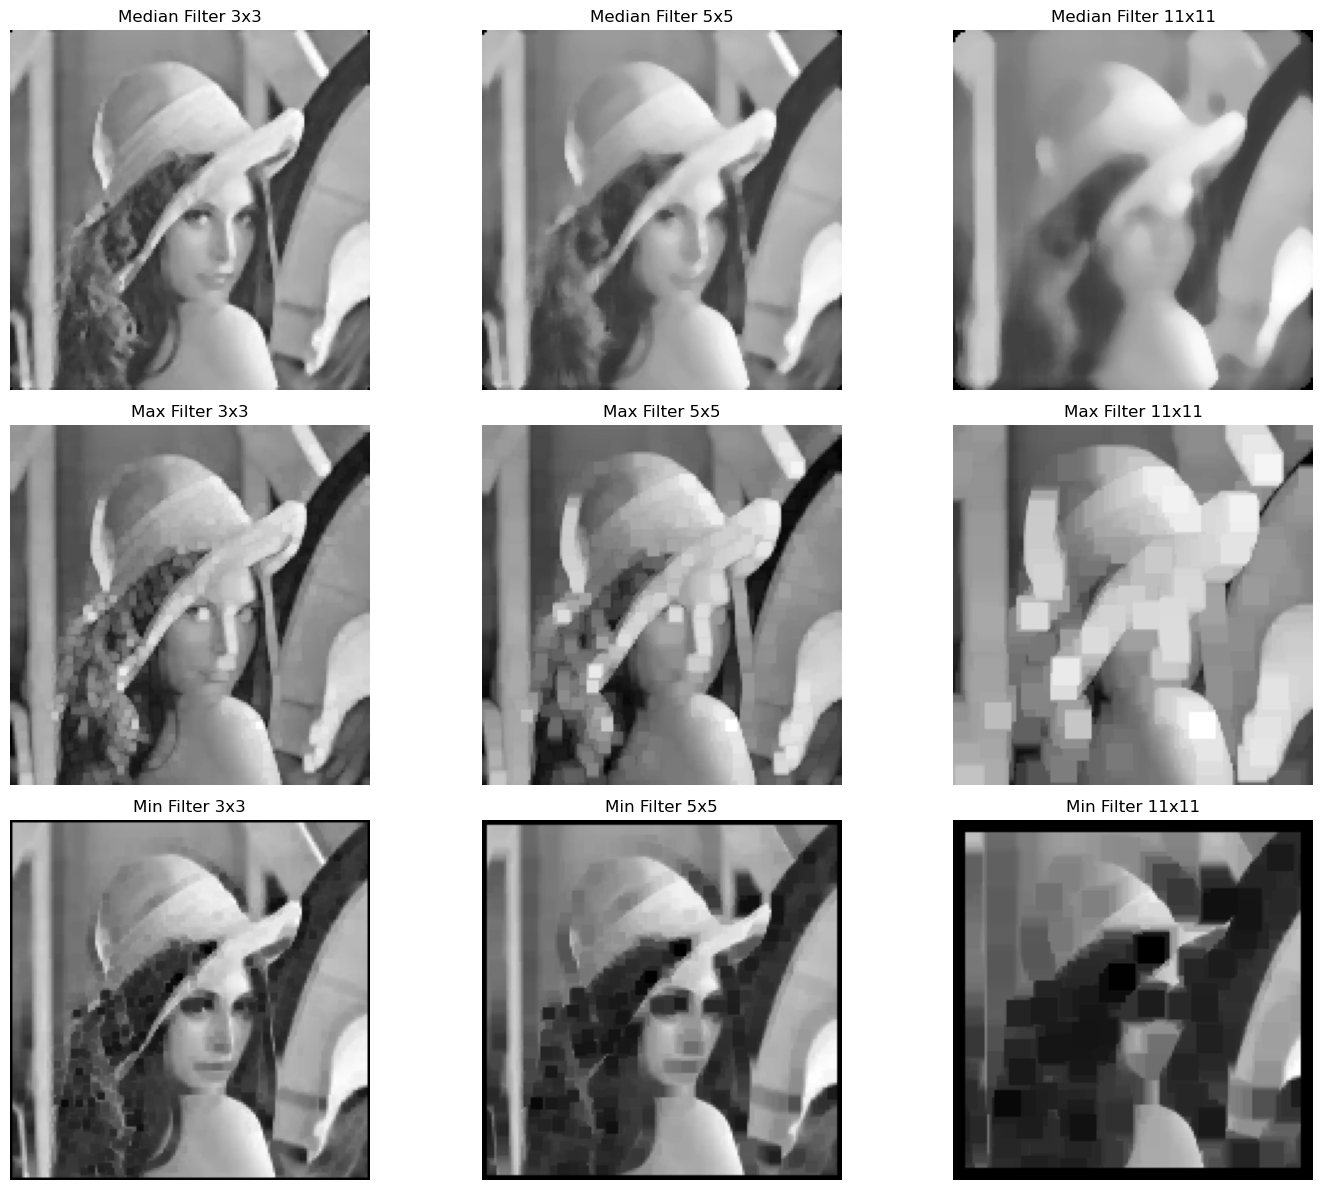

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_filter(image, size, filter_type):
    pad = size // 2
    rows, cols = image.shape
    
    padded_img = np.zeros((rows + 2 * pad, cols + 2 * pad))
    for i in range(rows):
        for j in range(cols):
            padded_img[i + pad][j + pad] = image[i][j]
    
    output = np.zeros_like(image)

    for i in range(rows):
        for j in range(cols):
            window = padded_img[i:i+size, j:j+size].flatten()

            if filter_type == 'median':
                output[i, j] = np.median(window)
            elif filter_type == 'max':
                output[i, j] = np.max(window)
            elif filter_type == 'min':
                output[i, j] = np.min(window)

    return output

image = cv2.imread('D:\\Code\\lenna.jpeg', cv2.IMREAD_GRAYSCALE)
filter_sizes = [3, 5, 11]

# Precompute
median_filtered_images = []
max_filtered_images = []
min_filtered_images = []

for i in range(len(filter_sizes)):
    size = filter_sizes[i]
    median_filtered_images.append(apply_filter(image, size, 'median'))
    max_filtered_images.append(apply_filter(image, size, 'max'))
    min_filtered_images.append(apply_filter(image, size, 'min'))

# Plotting
fig, axes = plt.subplots(3, len(filter_sizes), figsize=(15, 12))

for i in range(len(filter_sizes)):
    axes[0, i].imshow(median_filtered_images[i], cmap='gray')
    axes[0, i].set_title(f'Median Filter {filter_sizes[i]}x{filter_sizes[i]}')
    axes[0, i].axis('off')

    axes[1, i].imshow(max_filtered_images[i], cmap='gray')
    axes[1, i].set_title(f'Max Filter {filter_sizes[i]}x{filter_sizes[i]}')
    axes[1, i].axis('off')

    axes[2, i].imshow(min_filtered_images[i], cmap='gray')
    axes[2, i].set_title(f'Min Filter {filter_sizes[i]}x{filter_sizes[i]}')
    axes[2, i].axis('off')

plt.tight_layout()
plt.show()

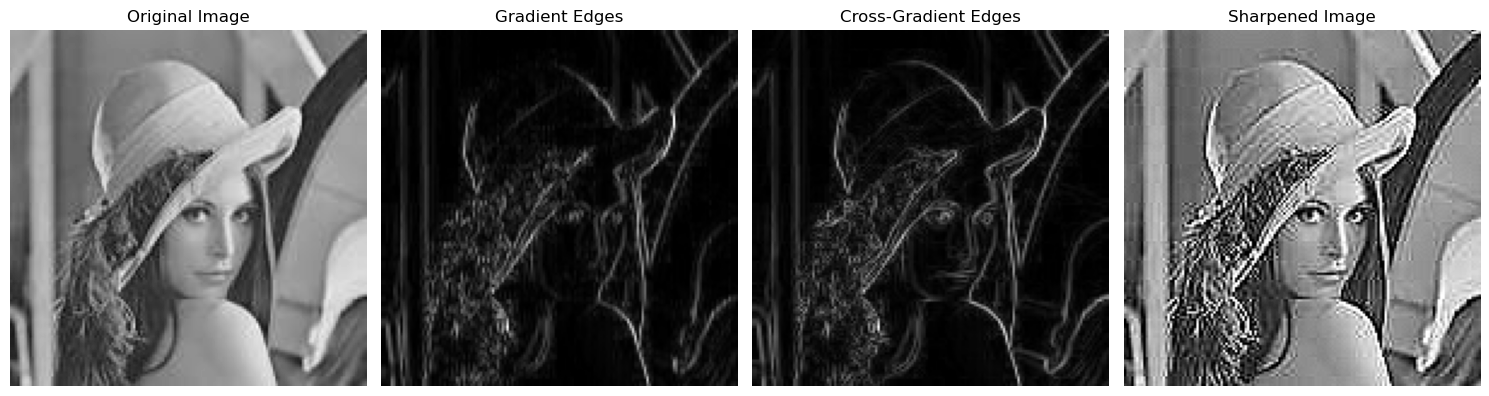

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('D:\\Code\\lenna.jpeg', cv2.IMREAD_GRAYSCALE)

image_norm = image / 255.0

gradient_x = np.array([[1, -1],
                       [0, 0]])

gradient_y = np.array([[0, 0],
                       [1, -1]])

cross_gradient_x = np.array([[1, 0],
                             [0, -1]])

cross_gradient_y = np.array([[0, 1],
                             [-1, 0]])

grad_x = cv2.filter2D(image_norm, -1, gradient_x)
grad_y = cv2.filter2D(image_norm, -1, gradient_y)
edges_gradient = np.sqrt(grad_x**2 + grad_y**2)
edges_gradient = (edges_gradient * 255).clip(0, 255).astype(np.uint8)

grad_x_cross = cv2.filter2D(image_norm, -1, cross_gradient_x)
grad_y_cross = cv2.filter2D(image_norm, -1, cross_gradient_y)
edges_cross = np.sqrt(grad_x_cross**2 + grad_y_cross**2)
edges_cross = (edges_cross * 255).clip(0, 255).astype(np.uint8)

sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5,-1],
                           [0, -1, 0]])

sharpened = cv2.filter2D(image, -1, sharpen_kernel)

plt.figure(figsize=(15, 10))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Gradient Edges")
plt.imshow(edges_gradient, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Cross-Gradient Edges")
plt.imshow(edges_cross, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Sharpened Image")
plt.imshow(sharpened, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

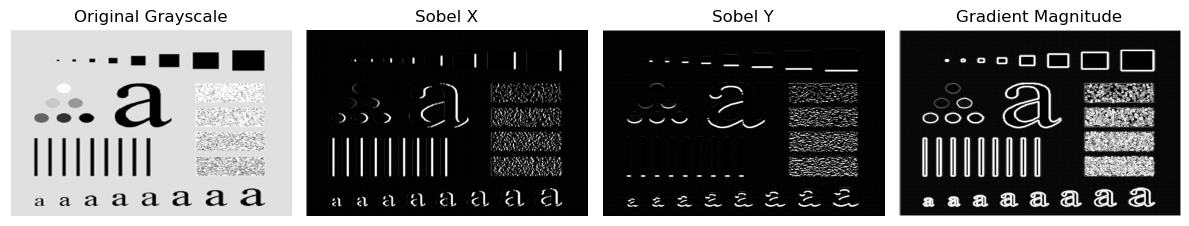

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_sobel_filter(image, kernel_x, kernel_y):
    # Get image dimensions
    h, w = image.shape
    pad_h, pad_w = 1, 1  # Sobel filter size is 3x3
    
    # Zero padding
    padded_image = np.zeros((h + 2*pad_h, w + 2*pad_w), dtype=np.float32)
    padded_image[pad_h:pad_h+h, pad_w:pad_w+w] = image.astype(np.float32)
    
    # Output arrays for Sobel X and Sobel Y
    sobel_x = np.zeros_like(image, dtype=np.float32)
    sobel_y = np.zeros_like(image, dtype=np.float32)
    
    # Apply Sobel filters (convolution)
    for i in range(1, h + 1):
        for j in range(1, w + 1):
            region = padded_image[i-1:i+2, j-1:j+2]
            sobel_x[i-1, j-1] = np.sum(region * kernel_x)
            sobel_y[i-1, j-1] = np.sum(region * kernel_y)

    return sobel_x, sobel_y

def calculate_magnitude(sobel_x, sobel_y):
    # Calculate gradient magnitude
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    return magnitude

# Load the image and convert to grayscale
image = cv2.imread('D:\\Code\\test_img.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define Sobel filters for X and Y directions
sobel_x_kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

sobel_y_kernel = np.array([[-1, -2, -1],
                           [ 0,  0,  0],
                           [ 1,  2,  1]])

# Apply Sobel filters
sobel_x, sobel_y = apply_sobel_filter(gray, sobel_x_kernel, sobel_y_kernel)

# Calculate the magnitude of the gradient
magnitude = calculate_magnitude(sobel_x, sobel_y)

# Convert results to uint8 for visualization
sobel_x = np.clip(sobel_x, 0, 255).astype(np.uint8)
sobel_y = np.clip(sobel_y, 0, 255).astype(np.uint8)
magnitude = np.clip(magnitude, 0, 255).astype(np.uint8)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel X")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(sobel_y, cmap='gray')
plt.title("Sobel Y")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis('off')

plt.tight_layout()
plt.show()

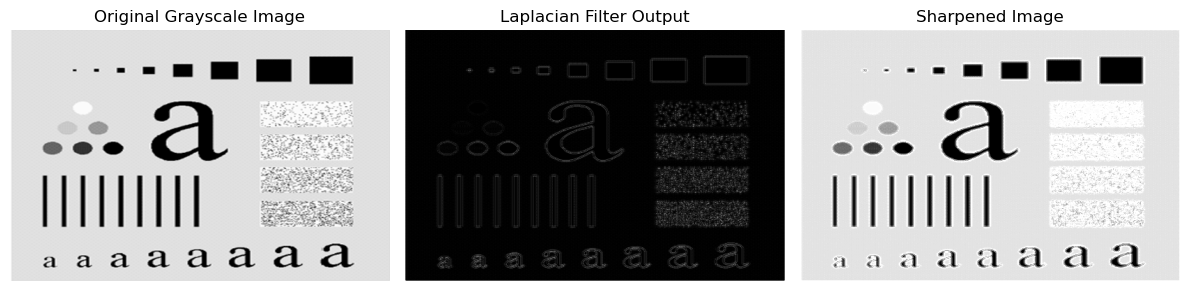

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def laplacian_filter(image):
    # Define the Laplacian kernel
    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]])
    
    # Get image dimensions
    h, w = image.shape
    pad_h, pad_w = 1, 1  # Laplacian filter size is 3x3
    
    # Zero padding the image
    padded_image = np.zeros((h + 2*pad_h, w + 2*pad_w), dtype=np.float32)
    padded_image[pad_h:pad_h+h, pad_w:pad_w+w] = image.astype(np.float32)
    
    # Output array for the Laplacian filter result
    laplacian_img = np.zeros_like(image, dtype=np.float32)
    
    # Apply Laplacian filter (convolution)
    for i in range(1, h + 1):
        for j in range(1, w + 1):
            region = padded_image[i-1:i+2, j-1:j+2]
            laplacian_img[i-1, j-1] = np.sum(region * kernel)
    
    return laplacian_img

def sharpen_image(original, laplacian):
    # Perform sharpening: sharpened = original + laplacian (absolute value)
    laplacian_abs = np.abs(laplacian)
    sharpened = original + laplacian_abs
    return np.clip(sharpened, 0, 255).astype(np.uint8)

# Load the image in grayscale
img = cv2.imread('D:\\Code\\test_img.png', cv2.IMREAD_GRAYSCALE)

# Apply Laplacian filter
laplacian = laplacian_filter(img)

# Sharpen the image using the Laplacian
sharpened_image = sharpen_image(img, laplacian)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.abs(laplacian), cmap='gray')
plt.title("Laplacian Filter Output")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')

plt.tight_layout()
plt.show()

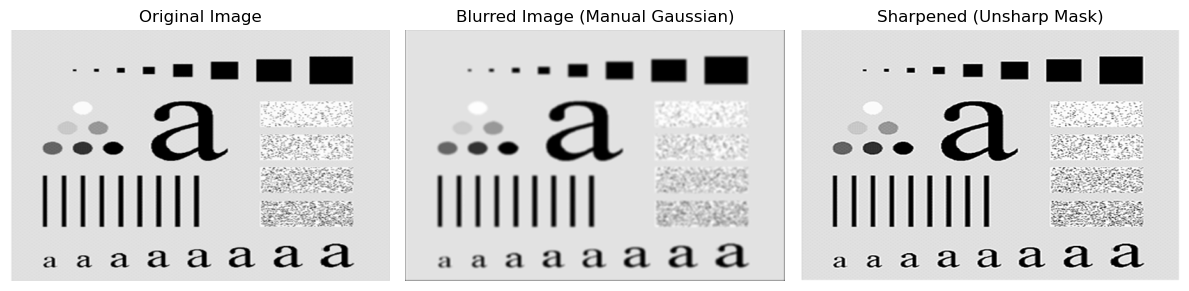

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

def generate_gaussian_kernel(ksize, sigma):
    """Create a ksize×ksize Gaussian kernel with standard deviation sigma."""
    center = ksize // 2
    kernel = [[0]*ksize for _ in range(ksize)]
    sum_val = 0.0
    for i in range(ksize):
        for j in range(ksize):
            x = i - center
            y = j - center
            val = math.exp(-(x*x + y*y) / (2 * sigma * sigma))
            kernel[i][j] = val
            sum_val += val
    # normalize so sum of weights = 1
    for i in range(ksize):
        for j in range(ksize):
            kernel[i][j] /= sum_val
    return np.array(kernel, dtype=np.float32)

def manual_convolve(image, kernel):
    """Convolve a single‐channel image with a small kernel, zero‐padding edges."""
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh//2, kw//2

    # zero‐pad
    padded = np.zeros((h + 2*pad_h, w + 2*pad_w), dtype=np.float32)
    padded[pad_h:pad_h+h, pad_w:pad_w+w] = image

    # allocate output
    out = np.zeros_like(image, dtype=np.float32)

    # convolution
    for i in range(h):
        for j in range(w):
            acc = 0.0
            for m in range(kh):
                for n in range(kw):
                    acc += padded[i+m, j+n] * kernel[m, n]
            out[i, j] = acc
    return out

# load and prepare
img = cv2.imread('D:\\Code\\test_img.png', cv2.IMREAD_GRAYSCALE).astype(np.float32)

# parameters
ksize = 5
sigma = 1.5
amount = 0.5

# 1) generate Gaussian kernel
gauss_kernel = generate_gaussian_kernel(ksize, sigma)

# 2) blur manually
blurred = manual_convolve(img, gauss_kernel)

# 3) high‐frequency component
high_freq = img - blurred

# 4) sharpen
sharpened = img + amount * high_freq

# clip and convert for display
orig_disp      = np.clip(img,       0, 255).astype(np.uint8)
blurred_disp   = np.clip(blurred,   0, 255).astype(np.uint8)
sharpened_disp = np.clip(sharpened, 0, 255).astype(np.uint8)

# display
plt.figure(figsize=(12, 8))

plt.subplot(1, 3, 1)
plt.imshow(orig_disp, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blurred_disp, cmap='gray')
plt.title('Blurred Image (Manual Gaussian)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened_disp, cmap='gray')
plt.title('Sharpened (Unsharp Mask)')
plt.axis('off')

plt.tight_layout()
plt.show()